# Effects of temperature on microbial carbon use efficiency

Danica Duan  
Emma Cavan, Tom Clegg, Samraat Pawar

## Introduction

## The Model
Adapted from [Emma Cavan](https://nbviewer.jupyter.org/github/e-cavan/Bacteria_Model/blob/master/Code/Consumer_Resource_Model.ipynb)'s model of the impact of chemical pollution on microbial communities. Originated from [Marsland et al. (2019)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006793) with [Tom Clegg](https://nbviewer.jupyter.org/github/CleggTom/Bacteria_EcoFunc/blob/master/notebooks/Metabolic_model.ipynb) making the first version.  

Further adapted to monitor microbial carbon use efficiency over time with different temperature. 

### Equations
#### General Model
Growth rate (biomass) of species i on resource j: 
\begin{equation}
dC_i/dt = C_i\Bigl(\sum_{j=1}^{M}U_{ij}s_j(1-\sum_{k=1}^{M}l_{jk}) - R_i\Bigl)
\end{equation}

Concentration dynamic of resource j:
\begin{equation}
dS_j/dt = \rho_j - \sum_{i=1}^{N}\Bigl(C_iU_{ij}s_j-\sum_{k=1}^{M}C_iU_{ik}s_kl_{kj}\Bigl)
\end{equation}

Type 2: Monod equation
\begin{equation}
s_j = \frac{S_j}{K_j + S_j}
\end{equation}




| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $M$ | Number of resources | - | User defined |
| $N$ | Number of species | - | User defined |
| $C_i$ | Bacteria population of species i | g/mL | 0.1 |
| $S_j$ | Concentration of resource j | g/mL | 0.1 |
| $K_j$ | Half saturation constant | g/mL | 0.5? (Dependant on temperature, species & resources?) |
| $U_{ij}$ | Uptake of resource j by species i | - | Temperature & size dependant |
| $R_i$ | Respiration of species i | - | Temperature & size dependant |
| $l_{jk}$ | Leakage: proportion of resource j converted to resource k | - | $l_j$ = 0.4|
| $\rho_j$ | Supply of resource j | g/mL | 1 |

###### Description: 
Generally speaking, the growth rate of speices i is calculated by the actual uptake of all resources by that species minus carbon loss through respiration:

\begin{equation}
\frac{1}{C_i}\frac{dC_i}{dt} = U_i - R_i
\end{equation}


The actual uptake by species i is calculated as follow, where $U_{ij}$ is the per biomass uptake rate of resource j by species i; $s_j$ is the Monod equation considering the concentration of resources (resource avalibility):

\begin{equation}
U_i = \sum_{j=1}^{M}U_{ij}s_j
\end{equation}

$l_{jk}$ represents the percentage of resources consumed but was transformed and released into the environment as another resource. 

In the resource model, the resource dynamic of the system is calculated by the external input of each resource which is constant through time as $\rho_j$, minus the uptake of $U_j$ by all species, and plus the internal supply by the conversion of other resources: 

\begin{equation}
\frac{dS_j}{dt} = \rho_j - U_j + L_j
\end{equation}


For each species i, the total uptake rate of resource j (not considering the release of k) is $C_iU_{ij}s_j$. 

The release of converted j from k is calculated by the uptake and leakage of resource k.  

\begin{equation}\label{eq:}
L_{ij} = \sum_{k=1}^{M}C_iU_{ik}s_kl_{kj}
\end{equation}



#### Size and Temperature Dependency
\begin{equation}
U_{ij} = B_{U}m^{-1/4} \times {e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}
\end{equation}

\begin{equation}
R_i = B_{R}m^{-1/4} \times {e^{\frac{-Ea_R}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}
\end{equation}

| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $B$ | Normalisation constant | - | Experimental observation |
| $m$ | Mass | g | 1 |
| $Ea$ | Activation energy | eV | Experimental observation |
| $k$ | Boltsmann constant | eV/K | $8.62$ $\times 10^{-5}$ |
| T | Temperature | K | User defined |
| $T_{ref}$| Reference temperature | K | 273.15 |

With modified Schoolfield ([Kontopoulos et al., 2020](https://onlinelibrary.wiley.com/doi/full/10.1111/evo.13946)): 
\begin{equation}
U_{ij} = \frac{B_{U}m^{-1/4} \times {e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}}{1 + \frac{Ea_U}{E_{D_U}-Ea_U}e^{\frac{E_{D_U}}{k}\cdot(\frac{1}{T_{pk_U}}-\frac{1}{T_{ref}})}}
\end{equation}

\begin{equation}
R_i = \frac{B_{R}m^{-1/4} \times {e^{\frac{-Ea_R}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}}{1 + \frac{Ea_R}{E_{D_R}-Ea_R}e^{\frac{E_{D_R}}{k}\cdot(\frac{1}{T_{pk_R}}-\frac{1}{T_{ref}})}}
\end{equation}

| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $E_D$ | High temperature deactivation energy | eV | 3.5|
| $T_{pk_U}$ | Temperature of peak uptake rate | K | 273.15 + 25 |
| $T_{pk_R}$ | Temperature of peak respiration rate | K | $T_{pk_U}$ + 2|

#### Carbon Use Efficiency

Percentage of carbon assimilated, calculated by growth rate over total actual uptake at each time point:

\begin{equation}
CUE_i = \frac{dC_i/dt}{C_i\sum \limits _{j=1}^{M}U_{ij}s_j}
\end{equation}


Only considering uptake and respiration (equals to whatever l is): 

\begin{equation}
CUE_i = 1 - \frac{R_i}{\sum\limits_{j=1}^{M}U_{ij}s_j}
\end{equation}


## Simulation

- Extincted species are detected and replaced (concentration < 0.01 g/mL).
- Steady state is reached when no concentration change within 50 time steps. 
- CUE is calculated at each time step for each consumer. 

### Example uptake and leakage matrix at 21 C (10 consumers, 5 resources)

- Uptake: assuming each consumer has one single temperature response curve which controls the total uptake of all resources. The resources uptake by each consumer are averagely and randomly distributed, which sum up to the total value calculated by the size and temperature dependency function.
- leakage(the conversion of resource j to k): the total conversion effecient of each resource is 0.4, which is averagely distributed among all resources it converted to. Assuming no resources can be converted back, so the lower diagnol is set to be 0. 

In [1]:
import parameters as par
import size_temp_funcs as st
import numpy as np

N = 10 # Number of consumers
M = 5 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
np.random.seed(0)
pk_U = np.random.normal(25, 3, size = N)
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
k = 0.0000862 # Boltzman constant
T_pk = Tref + pk_U # Peak above Tref, Kelvin
T = 273.15 + 21 # Model temperature
Ea_U = np.round(np.random.normal(1.5, 0.01, N),3)[0:N] # Ea for uptake
Ea_R = Ea_U - 0.8 # Ea for respiration, which should always be lower than Ea_U so 'peaks' later
B_U = (10**(2.84 + (-4.96 * Ea_U))) + 4 # B0 for uptake - ** NB The '+4' term is added so B_U>> B_R, otherwise often the both consumers can die and the resources are consumed
B_R = (10**(1.29 + (-1.25 * Ea_R))) # B0 for respiration

U_sum = st.temp_growth(k, T, Tref, T_pk, N, B_U, Ma, Ea_U, Ea_D)
np.random.seed(0)
diri = np.transpose(np.random.dirichlet(np.ones(M),N))
U = np.transpose(diri*U_sum)
print(U_sum)
print(U)

[374.86510036 369.75504506 375.28797111 376.76959358 378.80290903
 261.7331182  382.78024983 328.11593096 335.60825698 344.72783942]
[[ 69.16910368 109.15239058  80.23691781  68.41530614  47.89138215]
 [ 50.27224389  27.86917353 107.67284186 160.52264283  23.41814294]
 [100.94182115  48.42659333  54.00859759 167.17008822   4.74087081]
 [  6.30773441   1.41331419 123.68220997 104.1902127  141.17612232]
 [188.87691371  78.84920725  30.40175336  74.49209614   6.18293857]
 [ 50.02690916   7.57823198 141.76070949  36.13673973  26.23052785]
 [ 36.03667319 174.5368772   71.43087335  98.55126402   2.22456207]
 [ 45.77642311  45.09151294  45.68914637 137.03273522  54.52611332]
 [ 44.27344648  57.09421778 118.86333693   6.17271398 109.20454181]
 [165.31558988  35.16004058  20.54596313  56.40956758  67.29667825]]


In [2]:
import numpy as np

M = 5
np.random.seed(0)
l_raw = np.array([[np.random.normal(1/(i-1),0.005)* 0.4 if i-1>0 else np.random.normal(0.4, 0.005) for i in range(M,0,-1)] for i in range(1,M+1)])
fix = [[1 if j>i else 0 for j in range(M)] for i in range(M)]
fix[M-1][0] = 1
l = np.transpose(l_raw) * fix
print(l)
np.sum(l, axis = 1)

[[0.         0.09804544 0.10028809 0.10066735 0.09489402]
 [0.         0.         0.13624188 0.13632149 0.13464057]
 [0.         0.         0.         0.19958968 0.20172887]
 [0.         0.         0.         0.         0.39851567]
 [0.40933779 0.         0.         0.         0.        ]]


array([0.3938949 , 0.40720394, 0.40131856, 0.39851567, 0.40933779])

### Type I


#### 1 consumer, 1 resource, 25C

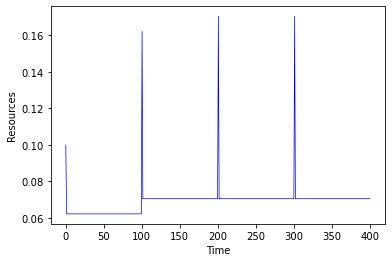

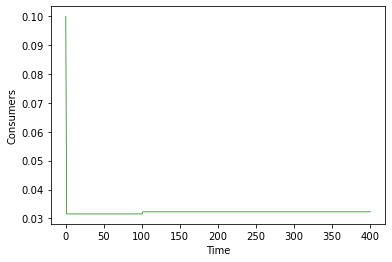

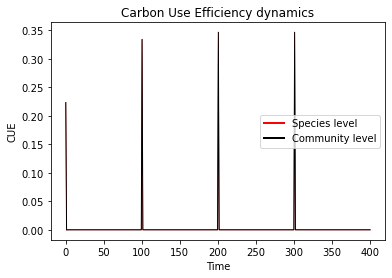

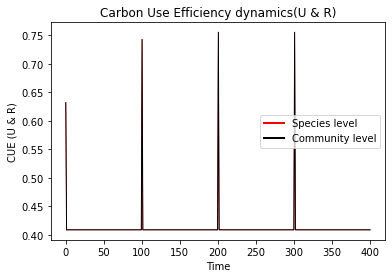

(array([1., 1., 1., 1.]),
 array([[ 2.2323e-01],
        [-1.8000e-04],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        

In [2]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 1 # Number of consumers
M = 1 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk_U = np.random.normal(25, 3, size = N)
pk_R = pk_U + 2
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy

# Assembly
ass = 1 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 1 # Half saturation constant for Monod equation(Type II)

cc = 3 # Times for increasing resource concentration for the next assembly

########## Running Model ###########
ass_temp_run(t_fin, N, M, T,  Tref, Ma, ass, x0, pk_R, pk_U, Ea_D, typ, K, cc)

#### 2 consumers, 1 resources, 25C

/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:165: RuntimeWarning: invalid value encountered in true_divide
  CUE = dCdt / (xc*np.einsum('ij,kj->ik', xr, U)) # CUE of single species
/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:166: RuntimeWarning: invalid value encountered in true_divide
  CUE_U = 1 - (xc * R/ (xc * np.einsum('ij,kj->ik', xr, U))) # Only considering uptake and respiration
/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:167: RuntimeWarning: invalid value encountered in true_divide
  dCdt_com = np.mean(dCdt/xc, axis = 1)* N # Community level growth rate


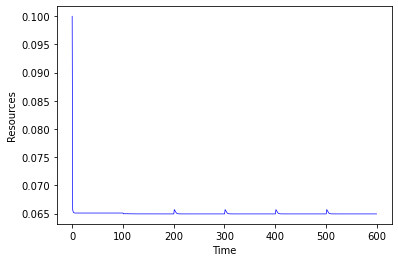

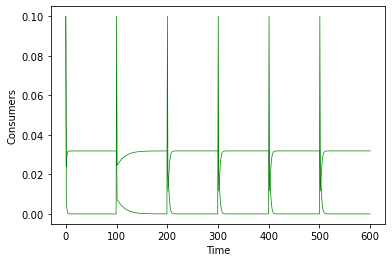

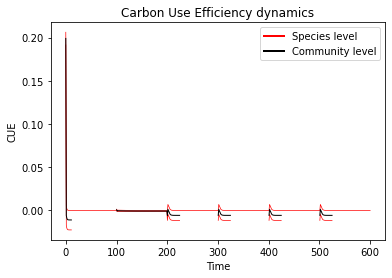

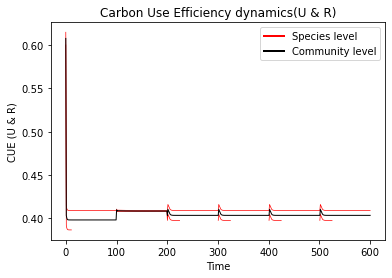

(array([1., 1., 1., 1., 1., 1.]),
 array([[ 0.19158,  0.20626],
        [-0.01725,  0.00511],
        [-0.0204 ,  0.00207],
        ...,
        [ 0.     ,      nan],
        [ 0.     ,      nan],
        [ 0.     ,      nan]]),
 array([[0.6004 , 0.61508],
        [0.39157, 0.41393],
        [0.38842, 0.41089],
        ...,
        [0.40882,     nan],
        [0.40882,     nan],
        [0.40882,     nan]]))

In [3]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 2 # Number of consumers
M = 1 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C

pk_U = np.random.normal(25, 3, size = N)
pk_R = pk_U + 2
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy

# Assembly
ass = 6 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

cc = 0 # Times for increasing resource concentration for the next assembly

########## Running Model ###########
ass_temp_run(t_fin, N, M, T,  Tref, Ma, ass, x0, pk_R, pk_U, Ea_D, typ, K, cc)

#### 10 consumers, 5 resources, 25C

/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:165: RuntimeWarning: invalid value encountered in true_divide
  CUE = dCdt / (xc*np.einsum('ij,kj->ik', xr, U)) # CUE of single species
/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:166: RuntimeWarning: invalid value encountered in true_divide
  CUE_U = 1 - (xc * R/ (xc * np.einsum('ij,kj->ik', xr, U))) # Only considering uptake and respiration
/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:167: RuntimeWarning: invalid value encountered in true_divide
  dCdt_com = np.mean(dCdt/xc, axis = 1)* N # Community level growth rate


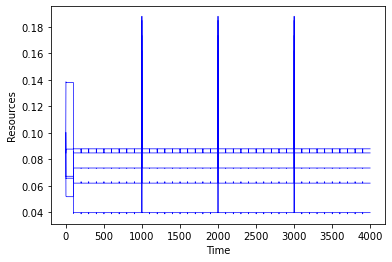

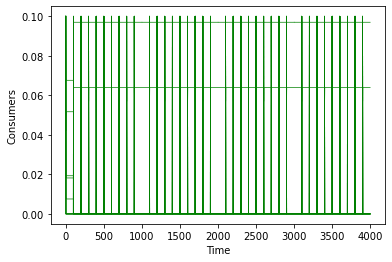

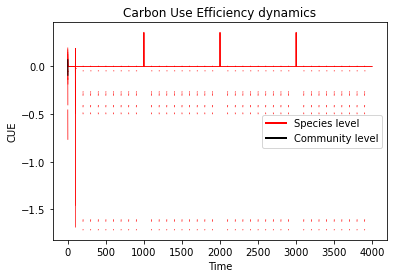

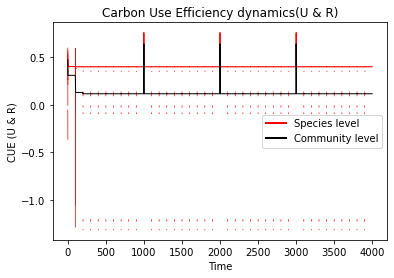

(array([4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2.]),
 array([[-4.5559e-01,  1.7600e-01, -4.6290e-02, ...,  1.4979e-01,
          1.8960e-02,  1.2747e-01],
        [-7.6656e-01,  1.6400e-03, -4.0411e-01, ...,  4.9900e-03,
         -6.7200e-03,  1.1300e-03],
        [        nan, -7.6000e-04,         nan, ...,  1.3800e-03,
         -2.2300e-03, -2.3000e-04],
        ...,
        [        nan,         nan, -0.0000e+00, ...,         nan,
          0.0000e+00,         nan],
        [        nan,         nan, -0.0000e+00, ...,         nan,
          0.0000e+00,         nan],
        [        nan,         nan, -0.0000e+00, ...,         nan,
          0.0000e+00,         nan]]),
 array([[-0.05342,  0.57604,  0.35264, ...,  0.55105,  0.42286,  0.52694],
        [-0.36345,  0.4025 , -0.00487, ...,  0.40772,  0.39836,  0.40242],
        [     nan,  0.40013,      nan

In [4]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 10 # Number of consumers
M = 5 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C

pk_U = np.random.normal(25, 3, size = N)
pk_R = pk_U + 2
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy

# Assembly
ass = 10 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

cc = 3 # Times for increasing resource concentration for the next assembly

########## Running Model ###########
ass_temp_run(t_fin, N, M, T,  Tref, Ma, ass, x0, pk_R, pk_U, Ea_D, typ, K, cc)

#### 100 consumers, 100 resources, 20C

/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:165: RuntimeWarning: invalid value encountered in true_divide
  CUE = dCdt / (xc*np.einsum('ij,kj->ik', xr, U)) # CUE of single species
/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:166: RuntimeWarning: invalid value encountered in true_divide
  CUE_U = 1 - (xc * R/ (xc * np.einsum('ij,kj->ik', xr, U))) # Only considering uptake and respiration
/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:167: RuntimeWarning: invalid value encountered in true_divide
  dCdt_com = np.mean(dCdt/xc, axis = 1)* N # Community level growth rate


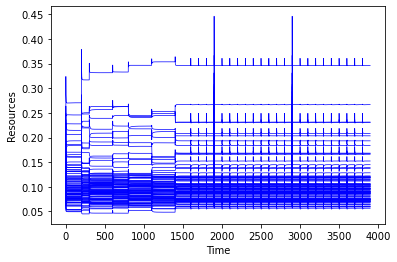

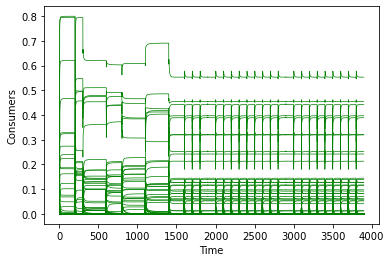

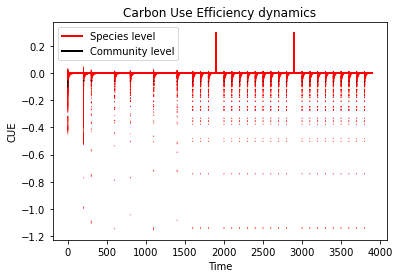

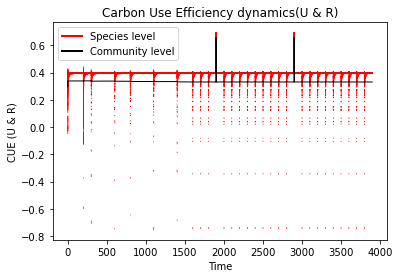

(array([19., 22., 29., 25., 28., 26., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28.]),
 array([[-9.4810e-02, -2.8056e-01, -3.2600e-02, ..., -7.1320e-02,
         -5.9330e-02, -4.5790e-02],
        [-8.5400e-02, -2.5758e-01,  1.9870e-02, ..., -1.8770e-02,
         -2.5400e-03,  1.1320e-02],
        [-7.8060e-02, -2.5407e-01,  5.5100e-03, ..., -1.3910e-02,
          1.8000e-04,  5.7500e-03],
        ...,
        [        nan,         nan, -0.0000e+00, ...,         nan,
         -0.0000e+00,  0.0000e+00],
        [        nan,         nan, -0.0000e+00, ...,         nan,
         -0.0000e+00,  0.0000e+00],
        [        nan,         nan, -0.0000e+00, ...,         nan,
         -0.0000e+00,  0.0000e+00]]),
 array([[0.30431, 0.11897, 0.36609, ..., 0.32589, 0.33724, 0.35271],
        [0.31325, 0.14138, 0.41844, ..., 0.37792, 0.39397, 0.40954],
        [0.32056, 0.14488, 0.40406, ..., 0.38289, 0.39648, 

In [5]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 100 # Number of resources

# Temperature params
T = 273.15 + 20 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk_U = np.random.normal(25, 3, size = N)
pk_R = pk_U + 2
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy

# Assembly
ass = 10 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

cc = 2 # Times for increasing resource concentration for the next assembly

########## Running Model ###########
ass_temp_run(t_fin, N, M, T,  Tref, Ma, ass, x0, pk_R, pk_U, Ea_D, typ, K, cc)

#### 100 consumers, 100 resources, 25C

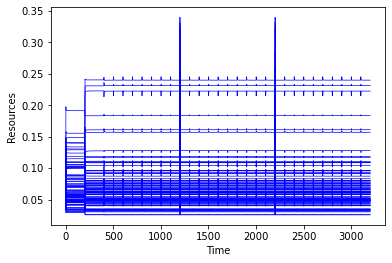

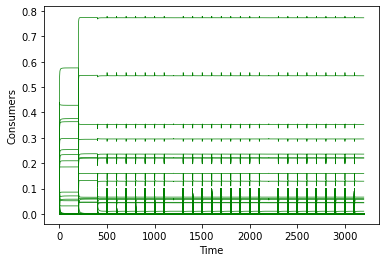

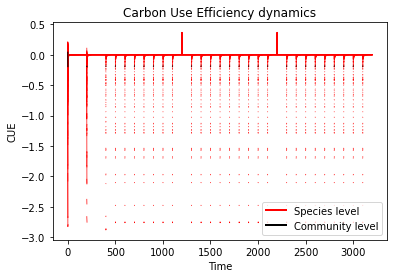

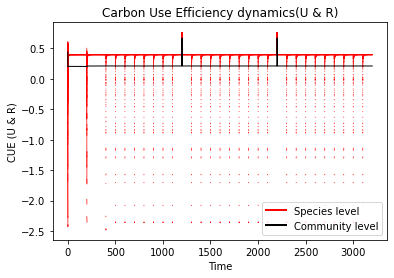

(array([14., 14., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.]),
 array([[-5.0520e-02, -3.7011e-01,  2.0385e-01, ...,  1.4629e-01,
         -1.5290e-02, -3.6046e-01],
        [-4.2534e-01, -7.8045e-01,  3.0500e-03, ..., -4.6520e-02,
         -2.7448e-01, -7.3788e-01],
        [        nan,         nan,  6.3000e-04, ..., -4.7210e-02,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,  0.0000e+00],
        [        nan,         nan,         nan, ...,         nan,
                 nan, -0.0000e+00],
        [        nan,         nan,         nan, ...,         nan,
                 nan, -0.0000e+00]]),
 array([[ 0.34861,  0.02943,  0.60254, ...,  0.54349,  0.38128,  0.03805],
        [-0.02703, -0.38069,  0.40117, ...,  0.34958,  0.1218 , -0.33951],
        [     nan,      nan,  0.39873, ...,  0.

In [9]:
## from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 100 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk_U = np.random.normal(25, 3, size = N)
pk_R = pk_U + 2
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy

# Assembly
ass = 10 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

cc = 2 # Times for increasing resource concentration for the next assembly

########## Running Model ###########
ass_temp_run(t_fin, N, M, T,  Tref, Ma, ass, x0, pk_R, pk_U, Ea_D, typ, K, cc)

####  100 consumers, 100 resources, 30C

/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:165: RuntimeWarning: invalid value encountered in true_divide
  CUE = dCdt / (xc*np.einsum('ij,kj->ik', xr, U)) # CUE of single species
/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:166: RuntimeWarning: invalid value encountered in true_divide
  CUE_U = 1 - (xc * R/ (xc * np.einsum('ij,kj->ik', xr, U))) # Only considering uptake and respiration
/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:167: RuntimeWarning: invalid value encountered in true_divide
  dCdt_com = np.mean(dCdt/xc, axis = 1)* N # Community level growth rate


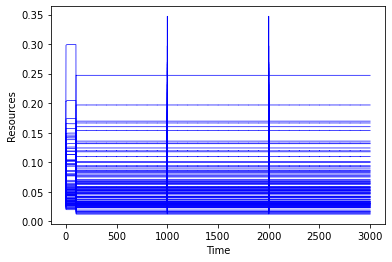

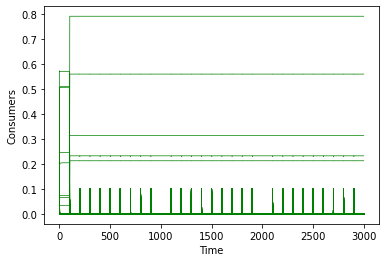

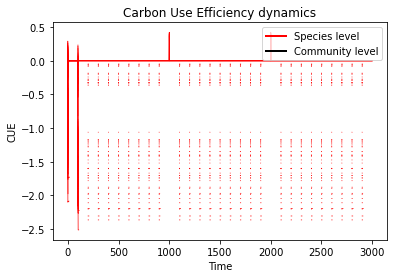

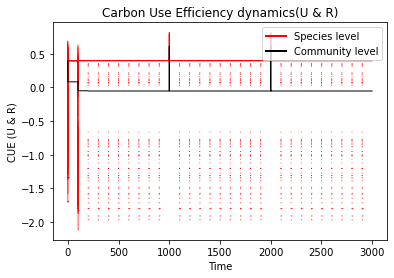

(array([8., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]),
 array([[-4.16750e-01, -7.36640e-01,  2.56240e-01, ...,  1.91900e-02,
         -3.64750e-01, -7.04370e-01],
        [-1.16350e+00, -1.37162e+00,  3.60000e-04, ..., -2.89090e-01,
         -8.47130e-01, -1.35764e+00],
        [         nan,          nan,  4.00000e-05, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]]),
 array([[-0.01763, -0.33711,  0.65493, ...,  0.4164 ,  0.03182, -0.30587],
        [-0.76599, -0.97189,  0.39798, ...,  0.10657, -0.451  , -0.9593 ],
        [     nan,      nan,  0.39765, ...,      

In [11]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 100 # Number of resources

# Temperature params
T = 273.15 + 30 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk_U = np.random.normal(25, 3, size = N)
pk_R = pk_U + 2
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy

# Assembly
ass = 10 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

cc = 2 # Times for increasing resource concentration for the next assembly

########## Running Model ###########
ass_temp_run(t_fin, N, M, T,  Tref, Ma, ass, x0, pk_R, pk_U, Ea_D, typ, K, cc)